<a href="https://colab.research.google.com/github/virajdesai0309/DWSim-X-NEQSim/blob/main/DWSim_X_NEQSim_Separator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separator Example

## Basis

This notebook demonstrates how to use the separator unit operation in NEQSim. It simulates the separation of an equimolar mixture of benzene and toluene. This example is based on a similar simulation in DWSim Process Simulator, where a stream with a temperature of 368 K, a pressure of 101325 Pa, and a flow rate of 1 kg/s is separated.

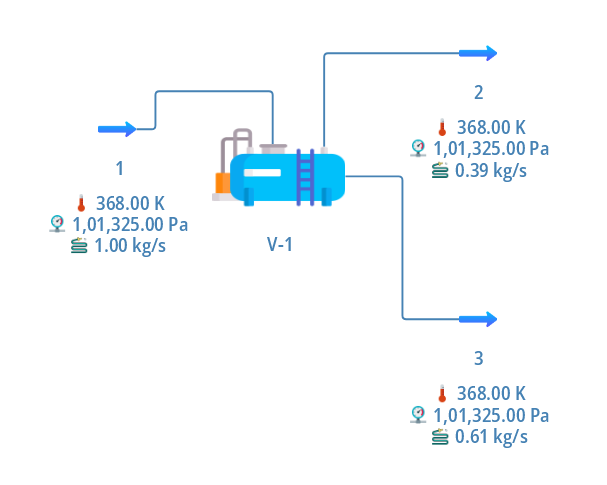

The simulation involves defining the fluid mixture, performing a TPflash for phase equilibrium calculations, setting up the feed stream, configuring the separator, running the simulation, and retrieving the vapor and liquid streams from the separator.

In [3]:
!pip install neqsim
from neqsim.thermo import fluid, TPflash, printFrame, dataFrame
from neqsim.process import clearProcess, stream, separator, runProcess

# 1. Define the fluid (benzene and toluene mixture)
fluid_mix = fluid('raoult')
fluid_mix.addComponent('benzene', 0.5)
fluid_mix.addComponent('toluene', 0.5)
fluid_mix.setMixingRule(3)
fluid_mix.setTemperature(368,'K')  # K
fluid_mix.setPressure(101325,'Pa')  # Pa
fluid_mix.setTotalFlowRate(3600, 'kg/hr')

# 2. Perform TPflash for phase equilibrium calculation
TPflash(fluid_mix)

# 3. Set up feed stream
clearProcess()  # clear any existing processes
feedStream = stream(fluid_mix)

# 4. Separator to split vapor and liquid
separator_unit = separator(feedStream)

# 5. Run the process simulation
runProcess()

# 6. Retrieve Vapor and Liquid Streams
vapor_stream = separator_unit.getGasOutStream()
liquid_stream = separator_unit.getLiquidOutStream()

# 7. Print Vapor Stream Specs
print("\n--- Vapor Stream Specs ---")
print(f"Temperature: {vapor_stream.getTemperature()} K")
print(f"Pressure: {vapor_stream.getPressure()} bar")
print(f"Flow rate: {vapor_stream.getFlowRate('kg/hr')/3600} kg/s")
print(f"Composition: {vapor_stream.getFluid().getComponentNames()}")

# 8. Print Liquid Stream Specs
print("\n--- Liquid Stream Specs ---")
print(f"Temperature: {liquid_stream.getTemperature()} K")
print(f"Pressure: {liquid_stream.getPressure()} bar")
print(f"Flow rate: {liquid_stream.getFlowRate('kg/hr')/3600} kg/s")
print(f"Composition: {liquid_stream.getFluid().getComponentNames()}")

# 9. Print Vapor Stream Specs using printFrame
print("\n--- Vapor Stream Specs ---")
printFrame(vapor_stream.getFluid())

# 10. Print Liquid Stream Specs using printFrame
print("\n--- Liquid Stream Specs ---")
printFrame(liquid_stream.getFluid())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.9 MB/s eta 0:00:00

--- Vapor Stream Specs ---
Temperature: 368.0 K
Pressure: 1.01325 bar
Flow rate: 0.3494453412684624 kg/s
Composition: ['benzene', 'toluene']

--- Liquid Stream Specs ---
Temperature: 368.0 K
Pressure: 1.01325 bar
Flow rate: 0.6505546587315378 kg/s
Composition: ['benzene', 'toluene']

--- Vapor Stream Specs ---
| 0                    | 1          | 2                 | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:------------------|:----|:----|:----|:----------------|
|                      | total      | GAS               |     |     |     |                 |
| benzene              | 6.38795E-1 | 6.38795E-1        |     |     |     | [mole fraction] |
| toluene              | 3.61205E-1 | 3.61205E-1        |     |     |     | [mole fraction] |
|                      |            |                   |